# View Classification with Selected Features
## 10-fold Cross Validation Using Random Forest

In [1]:
import numpy as np
import random
seed = 42
random.seed(seed)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Using TensorFlow backend.


In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confmat_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='summer')
    classNames = ['PA','AP']
    plt.title('RF Confusion Matrix (10-fold CV)')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    for i in range(2):
        for j in range(2):
            plt.text(j,i, (str(cm[i][j])))
    #plt.show()
    plt.savefig('cm_selected.png',bbox_inches = 'tight', dpi=300)

In [3]:
df = pd.read_csv('../input/cxf286/CXR_feature_IP_CXF30_HOG_24k.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,248,249,250,251,252,253,254,255,p1,p2,p3,ph1,ph2,ph3,pdx12,pdx23,pdx31,hdy12,hdy23,hdy_avg,n1,n2,nh1,nh2,ndx,ndy,n1_p1_dx,n1_p2_dx,n1_p3_dx,n2_p1_dx,n2_p2_dx,n2_p3_dx,n1_p1_dy,n1_p2_dy,n1_p3_dy,n2_p1_dy,n2_p2_dy,n2_p3_dy,patient_id,view
0,83.364514,88.691611,99.674551,108.142294,111.510303,112.116464,112.156975,111.643103,110.220956,108.277960,106.285147,104.541005,103.221083,102.355977,101.965303,101.885943,101.704451,101.427117,101.687329,102.909458,104.769730,106.825804,109.253381,112.655773,117.559503,124.042363,131.223289,137.403548,141.420895,143.516630,144.709458,145.573940,145.080030,141.231187,134.083565,126.483074,120.876242,117.407616,114.895444,112.227287,...,0.698839,0.002330,0.003512,0.002606,0.013950,0.127902,0.046652,0.104209,4,29,52,112.156975,145.573940,119.162594,25.0,23.0,48.0,33.416965,26.411346,29.914156,15,41,101.427117,103.304508,26.0,1.877391,11.0,14.0,37.0,37.0,12.0,11.0,10.729858,44.146823,17.735476,8.852467,42.269432,15.858085,b86e639a-5938-4126-b4fd-fc62f89ae7cf,0
1,116.099841,100.734521,74.487440,63.164857,67.267274,78.633354,93.514810,109.053207,121.531491,129.179100,133.317459,135.443665,135.811523,134.636405,132.685033,130.694706,128.732792,126.607003,124.355691,122.024592,119.943848,118.923449,119.497280,121.694779,125.384371,130.105061,135.571193,142.142687,149.714635,157.752900,166.005493,173.176776,177.646217,180.149983,182.142861,182.836945,180.106316,172.762499,161.933353,151.015373,...,0.518015,0.032539,0.000000,0.000000,0.004483,0.008771,0.118233,0.317959,10,33,52,135.811523,182.836945,132.488022,23.0,19.0,42.0,47.025422,50.348924,48.687173,1,19,63.164857,118.923449,18.0,55.758592,9.0,32.0,51.0,9.0,14.0,33.0,72.646666,119.672088,69.323164,16.888074,63.913496,13.564573,1d9dde4e-97cc-4163-a3d5-8b845ad60ded,0
2,51.866124,46.734992,39.926392,39.810350,42.750497,45.333090,48.212085,52.633720,59.705697,70.626798,85.577442,101.044289,111.730217,116.257081,116.751318,114.524315,110.394351,105.996904,102.465436,100.044427,98.701070,98.170617,98.189511,98.750098,100.085480,102.692213,106.799775,112.088912,119.013878,128.992679,142.067287,155.633883,166.224856,173.207365,179.322042,185.464266,187.867996,182.223164,168.378954,150.937099,...,0.539176,0.027720,0.016707,0.000040,0.078964,0.107155,0.095554,0.134684,12,34,53,116.751318,187.867996,114.944664,22.0,19.0,41.0,71.116677,72.923331,72.020004,1,19,39.810350,98.170617,18.0,58.360267,11.0,33.0,52.0,7.0,15.0,34.0,76.940969,148.057646,75.134315,18.580702,89.697379,16.774048,69c648f7-ef97-4c82-9587-4e0af5a0d44a,0
3,157.648775,162.622195,172.241501,177.815981,175.938319,168.852436,161.051003,154.980788,150.386810,146.677431,143.725089,141.528411,140.052150,139.036365,138.072911,137.138913,136.814409,138.008415,141.503990,147.157918,153.799237,160.289151,166.264725,172.304536,179.503257,188.453712,198.753103,208.792096,216.151350,220.053453,222.326757,224.282825,224.856076,221.980160,214.492265,204.008161,194.067397,186.444763,180.373015,174.673601,...,0.413785,0.025405,0.009752,0.011663,0.039674,0.108544,0.114906,0.276269,1,30,54,177.815981,224.856076,175.055850,29.0,24.0,53.0,47.040095,49.800226,48.420161,14,44,136.814409,134.659333,30.0,2.155076,13.0,16.0,40.0,43.0,14.0,10.0,41.001572,88.041667,38.241440,43.156648,90.196743,40.396516,5f7a6f70-a734-47d6-97a3-aa7ede0a2af8,0
4,7.182789,20.179846,51.591769,84.306033,107.871429,123.845086,134.127578,138.222157,137.642134,134.949922,132.052116,130.075306,129.169552,128.922515,128.853970,128.322263,127.182215,126.311579,126.548208,128.052190,131.142315,136.054828,141.224768,144.529056,146.706960,150.507891,157.173303,165.704386,174.185187,180.824082,185.001977,187.645698,189.419973,189.554535,187.085994,181.628515,173.169565,162.502292,151.669674,142.574024,...,0.365707,0.004169,0.004544,0.006509,0.008083,0.226497,0.106451,0.278039,5,31,54,138.222157,189.554535,130.112118,26.0,23.0,49.0,51.33

# 1. VIP + HIP + HOG + CXF30 with selected features

In [4]:
feat = [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
feat_ls = []
for i in range(len(feat)):
    if feat[i]==1:
        feat_ls.append(i)

In [5]:
X = df.iloc[:,feat_ls].values
y = df.iloc[:,287].values

In [6]:
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)

10-fold CV Accuracy:  96.3875 %


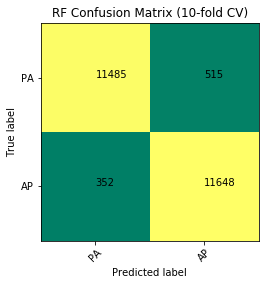

In [7]:
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 2. VIP + HIP + HOG

In [8]:
X = df.iloc[:,:256].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 3. VIP + HIP + CXF30

In [9]:
X = df.iloc[:,[i for i in range(0,128)] + [i for i in range(256,286)]].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 4. VIP + HIP

In [10]:
X = df.iloc[:,:128].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 5. VIP

In [11]:
X = df.iloc[:,:64].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 6. HIP

In [12]:
X = df.iloc[:,64:128].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 7. HOG

In [13]:
X = df.iloc[:,128:256].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)

# 8. CXF30

In [14]:
X = df.iloc[:,256:286].values
y = df.iloc[:,287].values
clf = RandomForestClassifier(n_estimators=100, max_depth=64,random_state=0,n_jobs=-1)
y_pred = cross_val_predict(clf, X, y, cv=10)
print('10-fold CV Accuracy: ',accuracy_score(y, y_pred)*100,'%')
conf_mat = confusion_matrix(y, y_pred)
confmat_plot(conf_mat)